# **CYBERBULLYING TWEET PREDICTION**

**Importing libraries** *

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer, WordNetLemmatizer
import pickle

import warnings
warnings.filterwarnings('ignore')

**Data Collection and Description**

In [ ]:
# importing the dataset

df1 = pd.read_csv("cyberbullying_tweets.csv")

In [ ]:
df = df1.copy()
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


**Exploratory Data Analysis**

In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
# length of dataset
len(df)

47692

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
# Checking for null values
np.sum(df.isnull())

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
# storing the data in lists
tweet, type = list(df['tweet_text']), list(df['cyberbullying_type'])

In [ ]:
df.iloc[0][0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

In [ ]:
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64




# Text Processing

In [ ]:
# converting tweet text to lower case
df['tweet_text'] = df['tweet_text'].str.lower()
df.tail()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
47687,"black ppl aren't expected to do anything, depe...",ethnicity,1
47688,turner did not withhold his disappointment. tu...,ethnicity,1
47689,i swear to god. this dumb nigger bitch. i have...,ethnicity,1
47690,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,1
47691,bro. u gotta chill rt @chillshrammy: dog fuck ...,ethnicity,1


# **Stop words are those high frequency words that are deemed unlikely to be useful for searching.They have less semantic weights.All such words in a list are called stopwords.**

Example :

"in","of","for","at" etc. 

In [ ]:
# stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# removing stopwoords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['tweet_text'] = df['tweet_text'].apply(lambda text: clean_stopwords(text))

In [ ]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_puctuations(x))


In [ ]:
df['tweet_text'][20]

'halalcunty biebervalue liamxkiwi greenlinerzjm halalflaws know saudis chased girls burning building httptco8b1aclczn9'

In [ ]:
# cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_repeating_characters(x))

In [ ]:
df['tweet_text'][55]

'bullshit mkr mkr215'

In [ ]:
# cleaning and removing URLs

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_URLs(x))

In [ ]:
df['tweet_text'][280]

'andaasonsan '

In [ ]:
# cleaning and removing numeric data

def clean_numeric(text):
    return re.sub('[0-9]+', '', text)
    
df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_numeric(x))

In [ ]:
df['tweet_text'][223]

'fact  cute boys world  go school sick shit'

In [ ]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
df['tweet_text'] = df['tweet_text'].apply(tokenizer.tokenize)

In [ ]:
df['tweet_text'][24]

['wishing',
 'arena',
 'partner',
 'on',
 'gtgt',
 'really',
 'want',
 'get',
 'pvp',
 'happening']

# **Stemming, the simplified form of morphological analysis, is the heuristic process of extracting the base form of words.** **

Example:
laughs,laughed,laughing comes from root word "laugh"

In [ ]:
# stemming

import nltk
nltk.download('all')

st = nltk.PorterStemmer()

def text_stemming(text):
    text = [st.stem(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_stemming(x))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
df['tweet_text'][35]

['andythewooki',
 'what',
 'quot',
 'jack',
 'off',
 'one',
 'hand',
 'point',
 'other']

**Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words**

Example:

"better" : "good"

In [ ]:
# lemmatization

lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_lemmatization(x))

# **Description of Updated data in the dataset**

In [ ]:
df['tweet_text'].head()

0             [word, katandandr, food, crapilici, mkr]
1    [aussietv, white, mkr, theblock, imacelebritya...
2    [xochitlsuckkk, classi, whore, red, velvet, cu...
3    [jasongio, meh, p, thank, head, up, but, not, ...
4    [rudhoeenglish, isi, account, pretend, kurdish...
Name: tweet_text, dtype: object

In [ ]:
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()


cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64

In [ ]:
# plotting word cloud excluding other_cybberbullying and not_cyberbullying
new_df = df
new_df = new_df[new_df['cyberbullying_type'] != 'other_cyberbullying']
new_df = new_df[new_df['cyberbullying_type'] != 'not_cyberbullying']
new_df = new_df['tweet_text'].apply(lambda x: " ".join(x))

In [ ]:
new_df

7945     rape realzvasiyana nema joke drunk gay lesbian...
7946     never saw celebr say anyth like obama b maher ...
7947     manhattaknight mean he gay but use gender slur...
7948     rt raulnovo aliciabernardez alexaim mecaesm fe...
7949     rape rape fact read one post guy get rape comm...
                               ...                        
47687    black ppl arent expect anyth depend anyth yet ...
47688    turner not withhold disappoint turner call cou...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel nigger fuck unfollow m...
47691    bro u gotta chill rt chillshrammi dog fuck kp ...
Name: tweet_text, Length: 31924, dtype: object

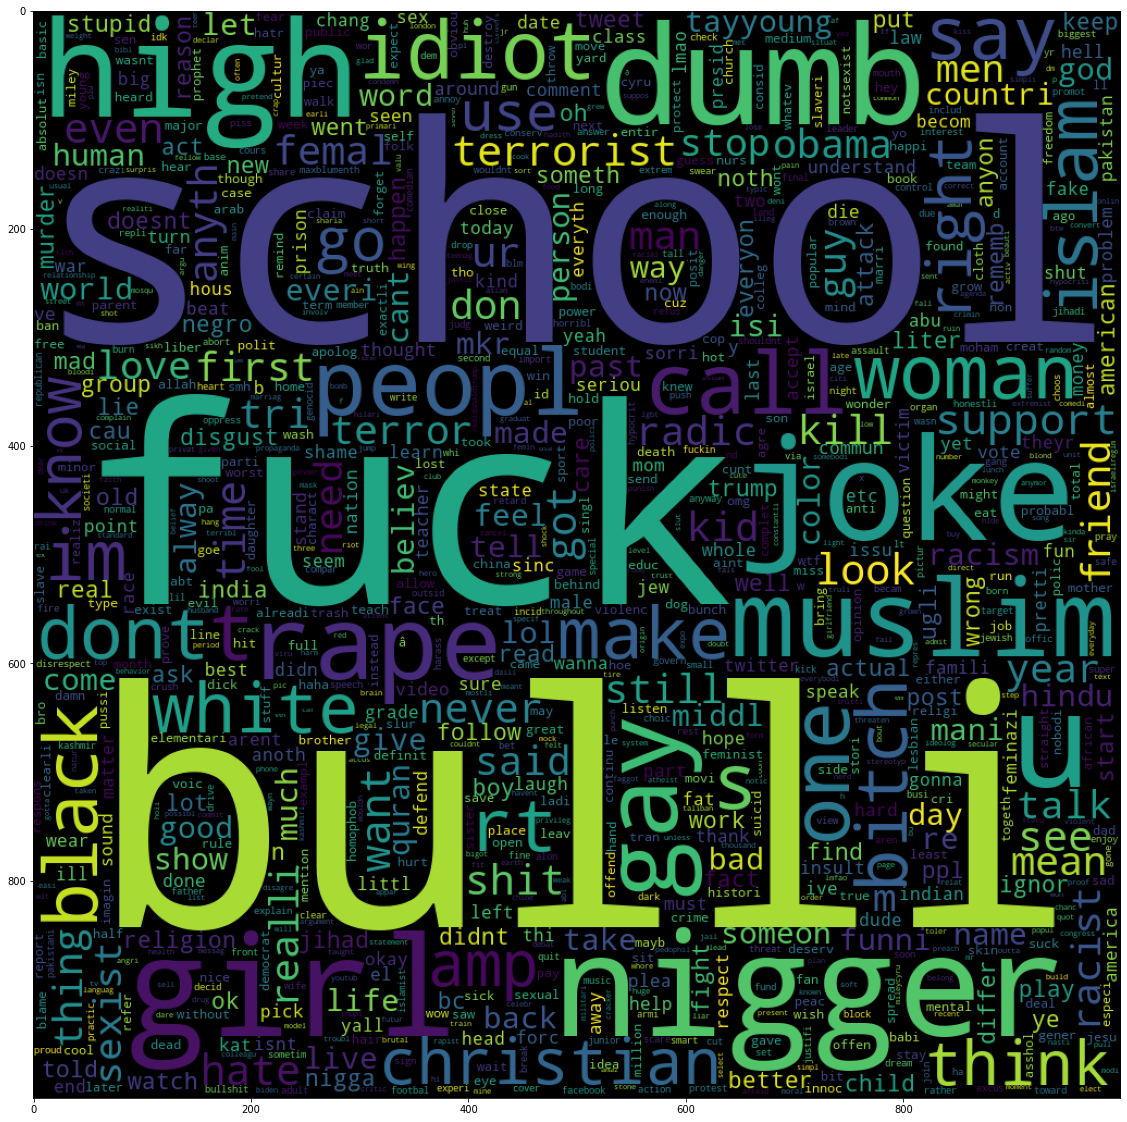

In [ ]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1000, height= 1000, 
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [ ]:
# Creating a word cloud
# We will have to exclude the tweets which are not_cyberbullying for this task 
data = pd.read_csv("cyberbullying_tweets.csv")
data = data[data['cyberbullying_type'] != "not_cyberbullying"]
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

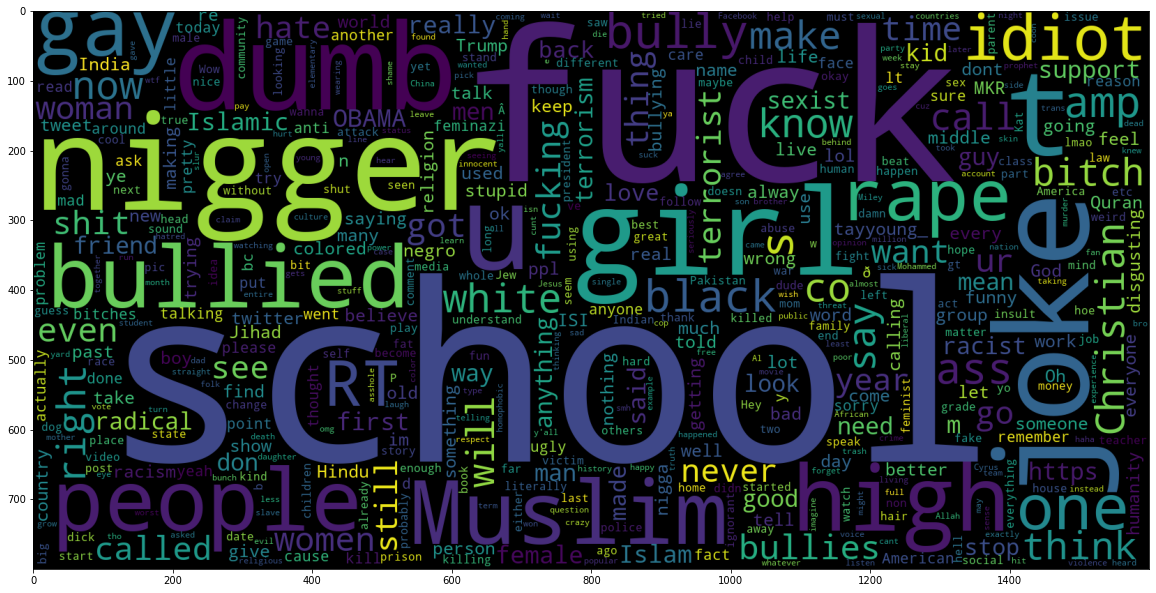

In [ ]:
# word cloud

plotting_data = data['tweet_text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=500, width= 1600, height= 800, 
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

#The Data visualization shows the words which are obvious in case of cyberbullying. But the word school seems odd here.  ***



In [ ]:
# excluding the other_cyberbullying values and plotting again
data_2 = data[data['cyberbullying_type'] != "not_cyberbullying"]
data_2 = data[data['cyberbullying_type'] != "other_cyberbullying"]
data_2['cyberbullying_type'].value_counts()

religion     7998
age          7992
gender       7973
ethnicity    7961
Name: cyberbullying_type, dtype: int64

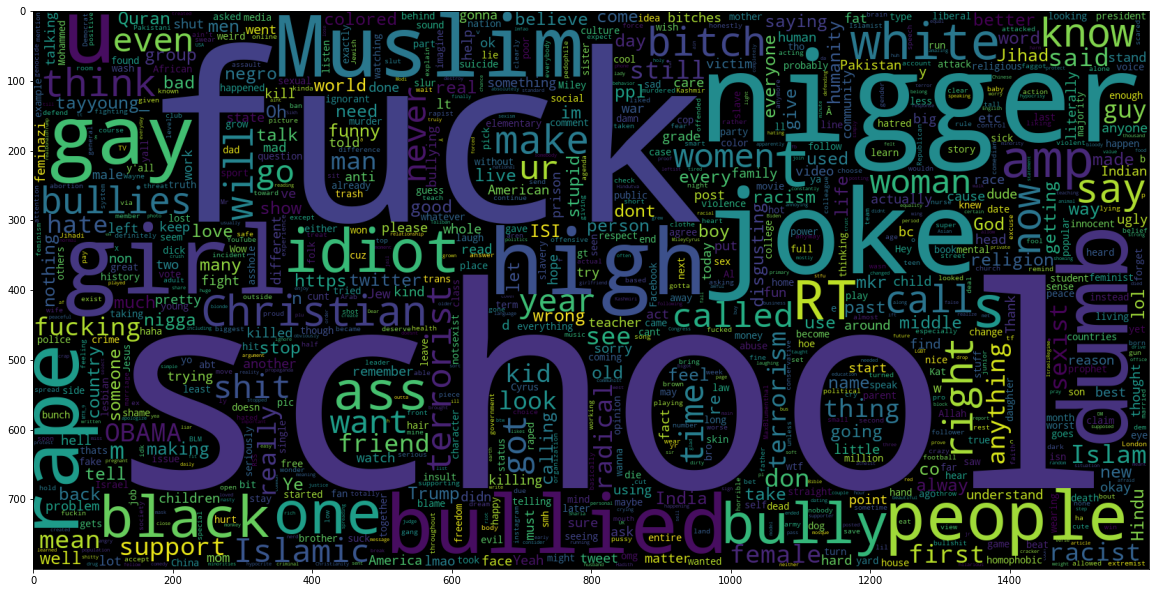

In [ ]:
plotting_data = data_2['tweet_text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

In [ ]:
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,"[word, katandandr, food, crapilici, mkr]",not_cyberbullying,3
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,3
2,"[xochitlsuckkk, classi, whore, red, velvet, cu...",not_cyberbullying,3
3,"[jasongio, meh, p, thank, head, up, but, not, ...",not_cyberbullying,3
4,"[rudhoeenglish, isi, account, pretend, kurdish...",not_cyberbullying,3
...,...,...,...
47687,"[black, ppl, arent, expect, anyth, depend, any...",ethnicity,1
47688,"[turner, not, withhold, disappoint, turner, ca...",ethnicity,1
47689,"[swear, god, dumb, nigger, bitch, got, bleach,...",ethnicity,1
47690,"[yea, fuck, rt, therealexel, nigger, fuck, unf...",ethnicity,1


We will consider the first Visualization.

### Initial Modelling: Model Creation

In [ ]:
df['tweet_text'] = df['tweet_text'].apply(lambda x : " ".join(x))
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,word katandandr food crapilici mkr,not_cyberbullying,3
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,3
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,3
3,jasongio meh p thank head up but not concern a...,not_cyberbullying,3
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,3
...,...,...,...
47687,black ppl arent expect anyth depend anyth yet ...,ethnicity,1
47688,turner not withhold disappoint turner call cou...,ethnicity,1
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,1
47690,yea fuck rt therealexel nigger fuck unfollow m...,ethnicity,1


In [ ]:
# Splitting the data into train and test
X, y = df['tweet_text'], df['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [ ]:
# Transforming the data using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)
print("No. of feature words: ",len(vectoriser.get_feature_names()))

No. of feature words:  312805


In [ ]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
# Model
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8290466871680179


In [ ]:
example = np.zeros(100)
example = ["But for u its Hinduphobia isnt it? When kashmiri pandits get killed, when a hindu girl gets raped by islamists, when radical islamic terrorism kill people in the world,u still keep quiet as if nothing is happening;but jump on when some1 says anything against islam!! #Hinduphobic",]
example = vectoriser.transform(example)
example

<1x312805 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [ ]:
svm_model_linear.predict(example)


array([5])

# **Classifier Model:**  ****

In [ ]:
# Importing dataset
data = df1.copy()

#### Encoding the *classification_type* values.

In [ ]:
labelencoder = LabelEncoder()
data['cyberbullying_type_encoded'] = labelencoder.fit_transform(data['cyberbullying_type'])
data[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64



# **Preprocessing:**

In [ ]:
# preprocessing functions

# converting tweet text to lower case
def text_lower(text):
    return text.str.lower()

# removing stopwoords from the tweet text
def clean_stopwords(text):
    # stopwords list that needs to be excluded from the data
    stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
    STOPWORDS = set(stopwordlist)
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# cleaning and removing punctuations
def clean_puctuations(text):
    english_puctuations = string.punctuation
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

# cleaning and removing repeating characters
def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

# cleaning and removing URLs
def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

# cleaning and removing numeric data
def clean_numeric(text):
    return re.sub('[0-9]+', '', text)

# Tokenization of tweet text
def tokenize_tweet(text):
    tokenizer = RegexpTokenizer('\w+')
    text = text.apply(tokenizer.tokenize)
    return text

# stemming    
def text_stemming(text):
    st = PorterStemmer()
    text = [st.stem(word) for word in text]
    return text

# lemmatization
def text_lemmatization(text):
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in text]
    return text

In [ ]:
# defining preprocess function

def preprocess(text):
    text = text_lower(text)
    text = text.apply(lambda text: clean_stopwords(text))
    text = text.apply(lambda x : clean_puctuations(x))
    text = text.apply(lambda x: clean_repeating_characters(x))
    text = text.apply(lambda x : clean_URLs(x))
    text = text.apply(lambda x: clean_numeric(x))
    text = tokenize_tweet(text)
    text = text.apply(lambda x: text_stemming(x))
    text = text.apply(lambda x: text_lemmatization(x))
    text = text.apply(lambda x : " ".join(x))
    return text

data['tweet_text'] = preprocess(data['tweet_text'])
data

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,word katandandr food crapilici mkr,not_cyberbullying,3
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,3
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,3
3,jasongio meh p thank head up but not concern a...,not_cyberbullying,3
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,3
...,...,...,...
47687,black ppl arent expect anyth depend anyth yet ...,ethnicity,1
47688,turner not withhold disappoint turner call cou...,ethnicity,1
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,1
47690,yea fuck rt therealexel nigger fuck unfollow m...,ethnicity,1


# **Model Training:**  *****

In [ ]:
# Splitting the data into train and test
X, y = data['tweet_text'], data['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [ ]:
# Transforming the data using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)
# print("No. of feature words: ",len(vectoriser.get_feature_names()))

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
# Dumping the vectoriser
pickle.dump(vectoriser, open('tdf_vectorizer', 'wb'))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [55]:
# Model
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8290466871680179
0.8290466871680179


In [56]:
# dumping the model
pickle.dump(svm_model_linear, open('model.bin', 'wb'))

#### Predicting Custom input:

In [57]:
# Function for custom input prediction
def custom_input_prediction(text):
    import nltk
    nltk.download('omw-1.4')
    text = pd.Series(text)
    text = preprocess(text)
    text = [text[0],]
    vectoriser = pickle.load(open("tdf_vectorizer", "rb"))
    text = vectoriser.transform(text)
    model = pickle.load(open("model.bin", "rb"))
    prediction = model.predict(text)
    prediction = prediction[0]

    interpretations = {
        0 : "Age",
        1 : "Ethnicity",
        2 : "Gender",
        3 : "Not Cyberbullying",
        4 : "Other Cyberbullying",
        5 : "Religion"
    }

    for i in interpretations.keys():
        if i == prediction:
            return interpretations[i]

In [58]:
something = "My Grandsons are angry about this gender free crap too! 2 in primary 2 @at high school T.he is 16 yr old ASD &amp; got bullied as did a girl in his SEN base. He had to step in as teachers to busy on phones playing games, wee lass would have had nowhere to run if loos unisex!"
something_2 = "Girl bully’s as well. I’ve 2 sons that were bullied in Jr High. Both were bullied by girls. My older was bullied because he had 4ft long brown hair and a baby face. Younger was bullied cuz he hung around the nerd crowd and was an easy target. I know what u mean though! Peace"
new_something = "There was certainly a more ""acceptable"" time for them to be made though in the eyes of our world at large (which also includes other jokes like rape, gaybashing, etc.) Shit, try watching Friends or Seinfeld and watch how many times they throw gay people under the bus for a laugh."
print(custom_input_prediction(something_2))
print(custom_input_prediction(something))
print(custom_input_prediction(new_something))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Age
Age


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Age
Age


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Gender
Gender
